### Project10 - Bank term deposit prediction

## Citation

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

__Objective:__ Term deposits are major revenue sources for banks. The project is related to direct marketing campaigns in banks, where we will predict the probability that a customer contacted by the phone banking team will subscribe for a term deposit. The project will also indicate the key variables that impact conversion.

## About the dataset
The source data consists of the following are the variables provided for 41188 customers:

<br>__age__: Age of customer
<br>__job__: type of job 
<br>__marital__: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<br>__education__: Customer education level
<br>__default__: has credit in default?
<br>__housing__: has housing loan?
<br>__loan__: has personal loan?


__Related with the last contact of the current campaign__:
<br>__contact__: contact communication type
<br>__month__: last contact month of year
<br>__day_of_week__: last contact day of the week

__Other attributes__:
<br>__campaign__: number of contacts performed during this campaign and for this client 
<br>__pdays__: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
<br>__previous__: number of contacts performed before this campaign and for this client
<br>__poutcome__: outcome of the previous marketing campaign

__Social and economic context attributes__:
<br>__emp.var.rate__: employment variation rate - quarterly indicator
<br>__cons.price.idx__: consumer price index - monthly indicator
<br>__cons.conf.idx__: consumer confidence index - monthly indicator 
<br>__euribor3m__: euribor 3 month rate - daily indicator
<br>__nr.employed__: number of employees - quarterly indicator

__Output variable (desired target)__:
<br>__y__: has the client subscribed a term deposit? (binary: 'yes','no')

## Project Instructions
1. Perform the required data pre-processing to treat for missing values and outliers
2. Perform exploratory data analysis to visualise the spread of each of the X variables and the relationship between the various X variables and the Y variable
3. Divide the given data into train and test sets
5. Predict customer propensity to subsribe to a term deposit by building classification models
7. Interpret how each of the X variables influence the conversion propensity
8. Evaluate the model performance measures and choose the most optimum model
9. Enlist your key findings based on the most optimum model and the respective feature importance

In [1]:
import pandas as pd

bankdata = pd.read_csv('bank.csv')
bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
import numpy as np

In [3]:
bankdata.shape

(41188, 20)

In [4]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 6.3+ MB


In [5]:
bankdata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [72]:
# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

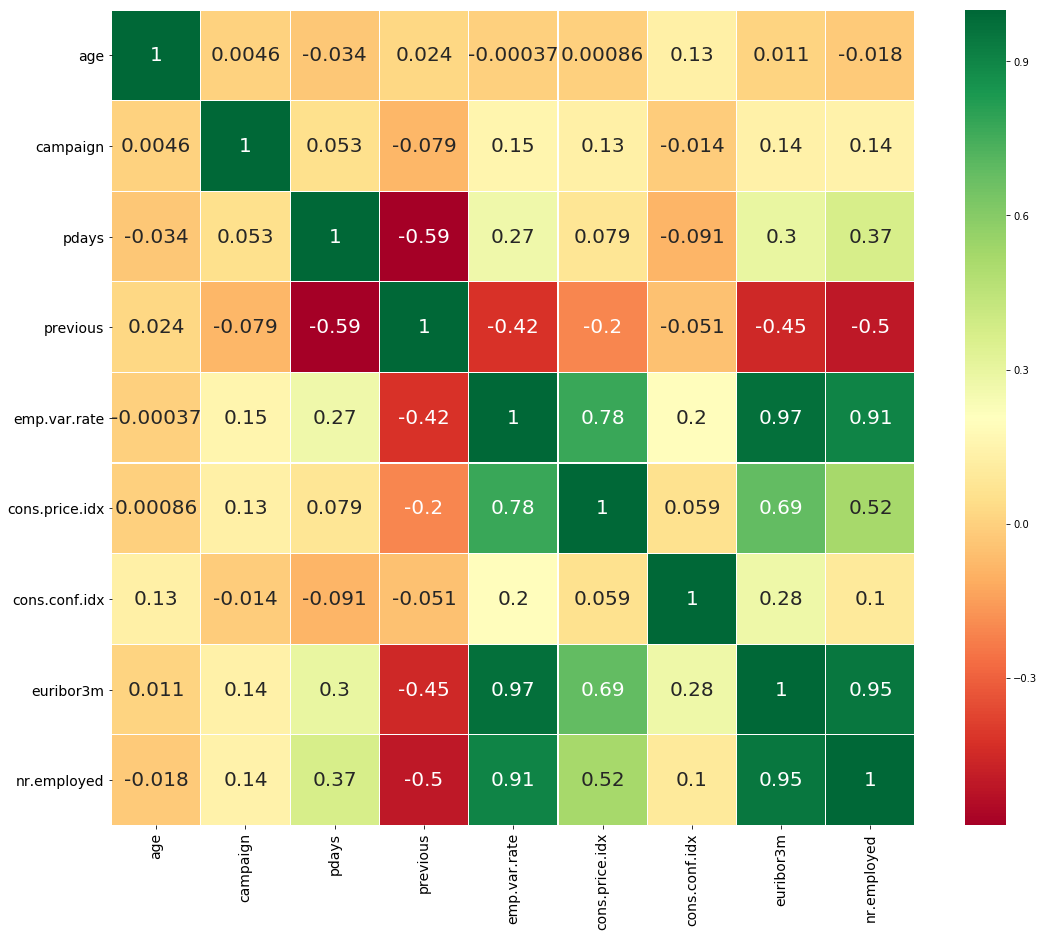

<Figure size 432x288 with 0 Axes>

In [74]:
corr = bankdata.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.savefig("figure.png") # save as pn

In [6]:
bankdata['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [7]:
bankdata['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [8]:
bankdata['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [9]:
bankdata['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [10]:
bankdata['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [11]:
bankdata['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [12]:
bankdata['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [13]:
bankdata['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [14]:
bankdata['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [15]:
bankdata['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [16]:
bankdata['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [17]:
bankdata['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [18]:
bankdata['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [19]:
bankdata['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [20]:
bankdata['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [21]:
bankdata['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [22]:
bankdata['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [23]:
bankdata['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [24]:
bankdata['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [25]:
bankdata['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [26]:
bankdata['y'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
bankdata['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [28]:
data = bankdata.copy()

In [29]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [30]:
data['job'].replace(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)

In [31]:
data['marital'].replace(['married','single','divorced','unknown'],[0,1,2,3],inplace=True)

In [32]:
data['education'].replace(['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate'],[0,1,2,3,4,5,6,7],inplace=True)

In [33]:
data['default'].replace(['yes', 'no', 'unknown'],[0,1,2,],inplace=True)

In [34]:
data['housing'].replace(['yes', 'no', 'unknown'],[0,1,2,],inplace=True)

In [35]:
data['loan'].replace(['no','yes','unknown'],[0,1,2],inplace=True)

In [36]:
data['contact'].replace(['telephone', 'cellular'],[0,1],inplace=True)

In [37]:
data['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep'],[0,1,2,3,4,5,6,7,8,9],inplace=True)

In [38]:
data['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'],[0,1,2,3,4],inplace=True)

In [39]:
data['poutcome'].replace(['nonexistent', 'failure', 'success'],[0,1,2,],inplace=True)

In [40]:
data['y'].replace(['no','yes'],[0,1],inplace=True)

In [41]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,1,1,0,0,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,2,1,0,0,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,1,0,0,0,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,1,1,0,0,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,1,1,1,0,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null int64
marital           41188 non-null int64
education         41188 non-null int64
default           41188 non-null int64
housing           41188 non-null int64
loan              41188 non-null int64
contact           41188 non-null int64
month             41188 non-null int64
day_of_week       41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(15)
memory usage: 6.3 MB


In [43]:
data.corr().T

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.030413,-0.114983,-0.091900,0.164910,0.000987,-0.006397,-0.007021,0.083423,-0.018486,0.004594,-0.034369,0.024365,0.026371,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.030413,1.000000,-0.008109,0.164598,-0.012964,-0.003577,-0.004950,0.017054,0.076486,-0.001608,-0.017085,-0.051677,0.051348,0.049070,-0.083007,-0.046067,0.022933,-0.072497,-0.084981,0.054793
marital,-0.114983,-0.008109,1.000000,0.063774,-0.103576,-0.003643,0.001719,0.043564,0.020613,-0.004210,0.002269,-0.017635,0.030222,0.030627,-0.048931,-0.024995,-0.051013,-0.054623,-0.050058,0.026302
education,-0.091900,0.164598,0.063774,1.000000,-0.144126,-0.018389,0.001887,0.095383,0.114478,0.008519,-0.001521,-0.034772,0.022826,0.025419,-0.033385,-0.079517,0.071758,-0.024348,-0.025485,0.045721
default,0.164910,-0.012964,-0.103576,-0.144126,1.000000,0.017429,0.001205,-0.135698,-0.135876,-0.003915,0.033077,0.079987,-0.102630,-0.108394,0.203061,0.168335,0.026249,0.195079,0.189544,-0.099199
housing,0.000987,-0.003577,-0.003643,-0.018389,0.017429,1.000000,0.234192,-0.083498,-0.055884,0.009221,0.009768,0.010376,-0.017647,-0.021599,0.055645,0.079528,0.033586,0.054698,0.040855,-0.011379
loan,-0.006397,-0.004950,0.001719,0.001887,0.001205,0.234192,1.000000,-0.004391,-0.009311,0.003206,0.003899,0.001298,0.000846,-0.000581,0.003055,0.006315,-0.005895,0.001547,0.002464,-0.005038
contact,-0.007021,0.017054,0.043564,0.095383,-0.135698,-0.083498,-0.004391,1.000000,0.430499,-0.019583,-0.077368,-0.117970,0.212848,0.226813,-0.393584,-0.591474,-0.251614,-0.399773,-0.269155,0.144773
month,0.083423,0.076486,0.020613,0.114478,-0.135876,-0.055884,-0.009311,0.430499,1.000000,0.011701,-0.080737,-0.135025,0.175737,0.184769,-0.306009,-0.330558,-0.060670,-0.276126,-0.262145,0.183471
day_of_week,-0.018486,-0.001608,-0.004210,0.008519,-0.003915,0.009221,0.003206,-0.019583,0.011701,1.000000,0.015098,0.006765,0.004013,0.003279,-0.004401,-0.004586,-0.000099,-0.005552,-0.000734,0.010051


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

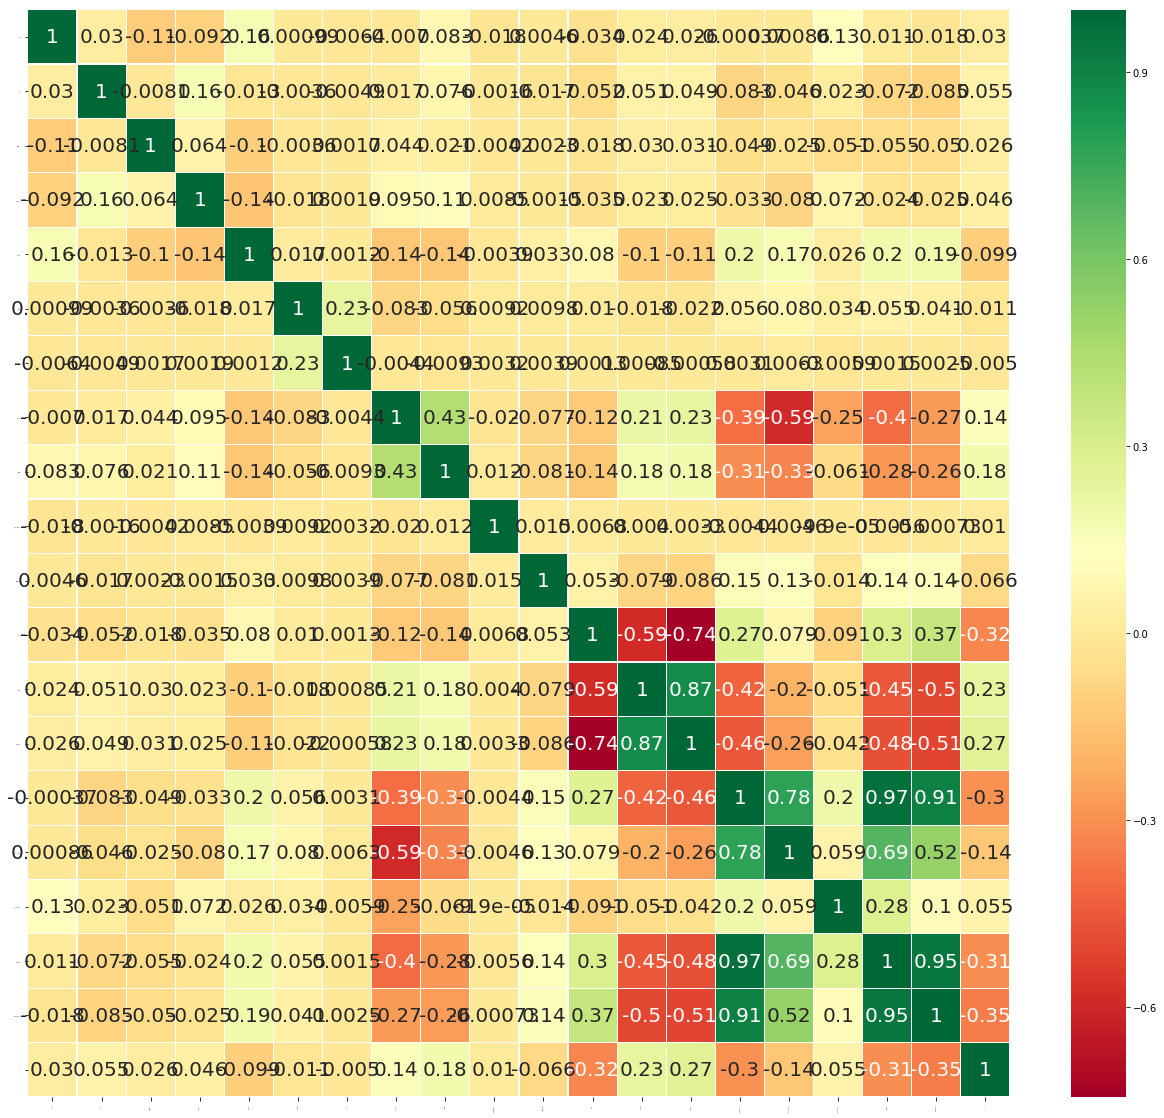

In [65]:
corr = data.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(22,20)
plt.xticks(fontsize=1)
plt.yticks(fontsize=1)
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


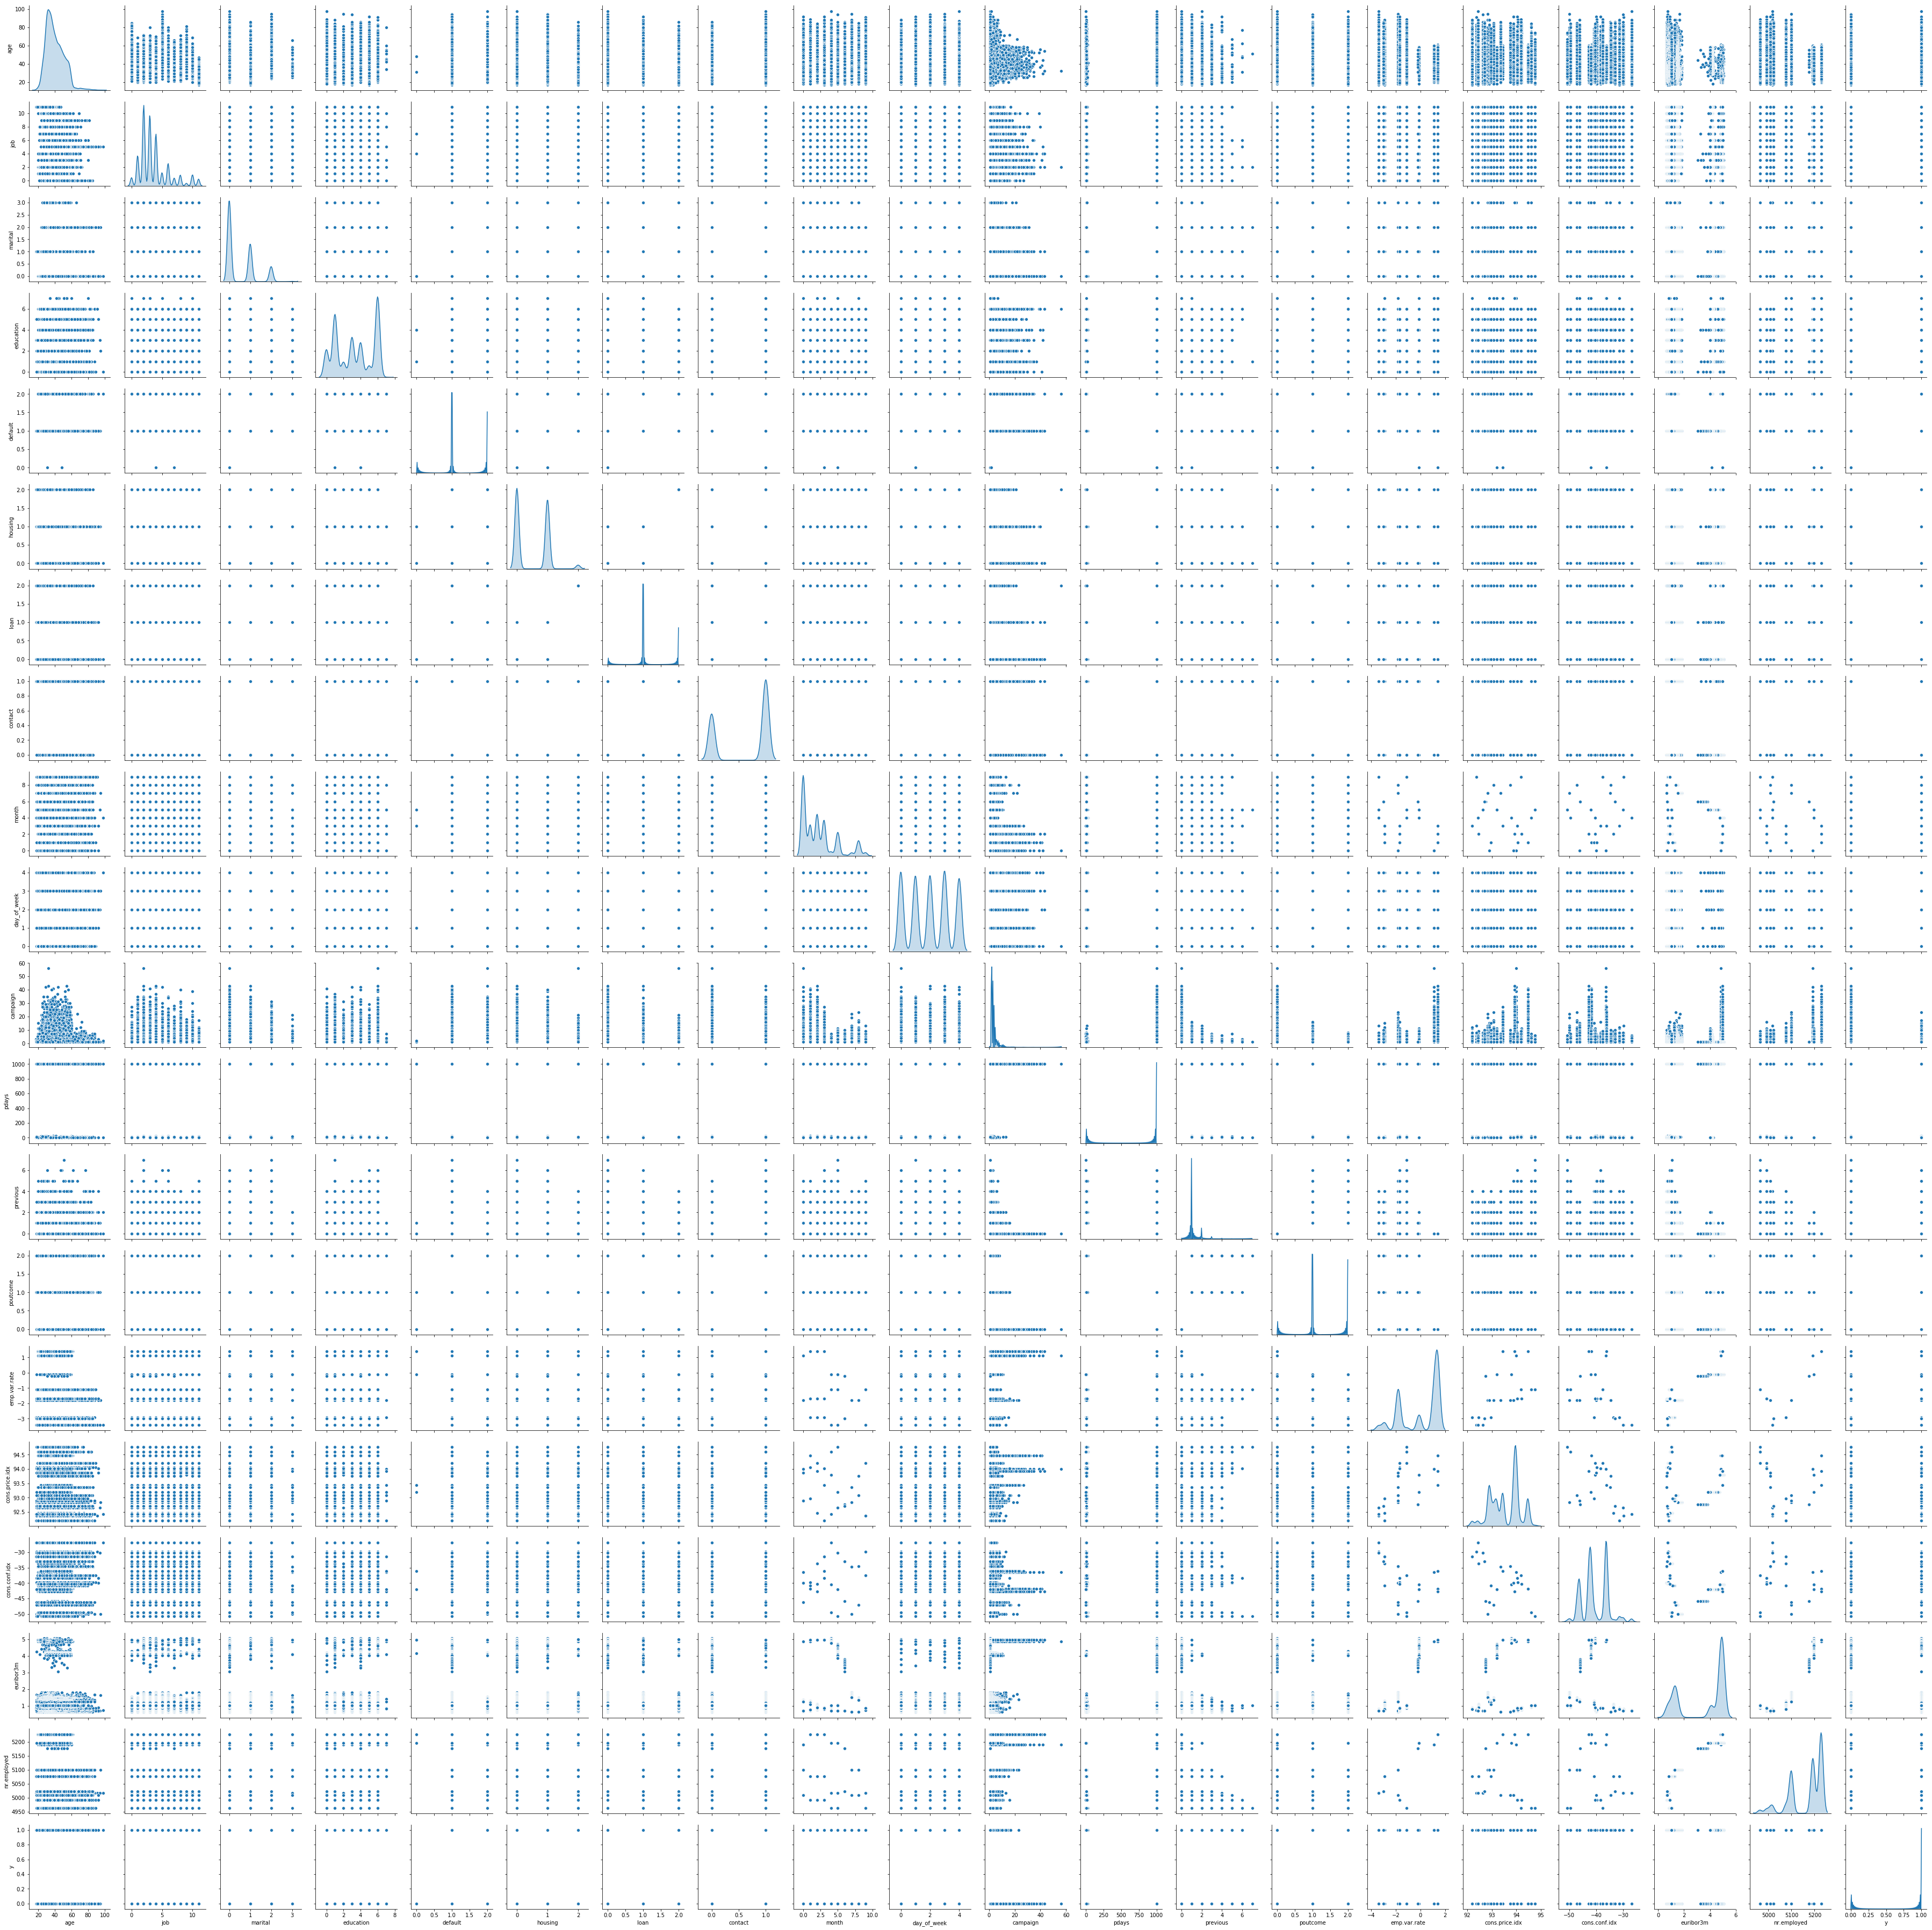

In [45]:
sns.pairplot(data,diag_kind = 'kde')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [47]:
# Putting feature variable to X
x = data.drop(['y'],axis=1)

# Putting response variable to y
y = data['y']

In [48]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,test_size=0.3,random_state=100,stratify=y)

In [49]:
#Logistic model

logistic = LogisticRegression()
model = logistic.fit(x_train,y_train)
pred  = logistic.predict(x_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
print(accuracy_score(y_test,pred)*100)

89.89236869790402


In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10965
           1       0.69      0.19      0.30      1392

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [52]:
print(f1_score(y_test,pred))

0.2963380281690141


In [53]:
confusion_matrix = metrics.confusion_matrix(y_test,pred)
confusion_matrix

array([[10845,   120],
       [ 1129,   263]], dtype=int64)

In [54]:
TP = confusion_matrix[0,0] # true positive 
TN = confusion_matrix[1,1] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [55]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9057123768164356

In [56]:
# Let us calculate specificity
TN / float(TN+FP)

0.6866840731070496

In [57]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.3133159268929504


In [58]:
# positive predictive value 
print (TP / float(TP+FP))

0.9890560875512996


In [59]:
# Negative predictive value
print (TN / float(TN+ FN))

0.18893678160919541


In [60]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

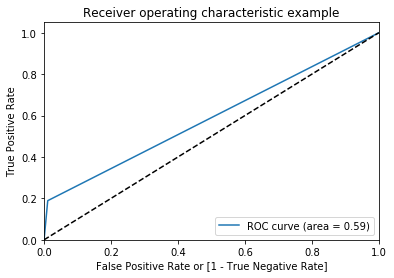

(array([0.        , 0.01094391, 1.        ]),
 array([0.        , 0.18893678, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [61]:
draw_roc(y_test, pred)